In [1]:
import math
import hoomd
import numpy as np
import itertools
import gsd.hoomd
import matplotlib.pyplot as plt
from multiprocessing import Pool
#import importlib
from system import System
import time
#importlib.reload(System)

In [2]:
#packing_density=[0.1,0.2,0.3,0.4]

#粒子总数
N=5000
num_particles = 5000
#每次开始插入之前，先对基础的系统预处理pre_random步数
pre_random = 5000
#粒子的总面积/盒子面积为packing_density
packing_density_0=0.5
packing_density = packing_density_0 * num_particles/N
#压缩系数
condensed_ratio=0.98
#微小间距
margin=0.2
cpu=hoomd.device.CPU()
mc = hoomd.hpmc.integrate.ConvexPolygon(default_d=0.1,default_a=0.2,translation_move_probability=0.2)
cpu=hoomd.device.CPU()
mc = hoomd.hpmc.integrate.ConvexPolygon(default_d=0.1,default_a=0.2)
mc.shape["A"] = dict(
                vertices = [
                (-2, 0),
                (2, 0),
                (11/8, 5*math.sqrt(63)/8),
                ]
    )
particle_area=5*math.sqrt(63)/4

system=System(
        num=num_particles,packing_density=packing_density,
        packing_density_0=packing_density_0,
        particle_area=particle_area,
        mc=mc,condensed_ratio=condensed_ratio,margin=margin,
        pre_random=pre_random,device=cpu
    )

system.generate_particle()

print(f"\n正在预热系统，进行 {pre_random} 次移动...")
start_time=time.time()
system.randomizing_particles()
system.save_to_gsd()
end_time = time.time()
print(f"预热完成，耗时: {end_time - start_time:.2f} 秒")

成功初始化了 5000 个有序排列的三角形粒子（交错网格）,盒子长314.99,盒子高314.99,行间距=4.63, 列间距=4.20。

正在预热系统，进行 5000 次移动...
预热完成，耗时: 93.03 秒


In [3]:
sdf_mc=500000
sdf_xmax=0.05
sdf_dx=10e-5
sdf_each_run=5

total_sdf_xcompression,total_sdf_sdfcompression=system.calculate_sdf(sdf_mc,sdf_xmax,sdf_dx,sdf_each_run)

print(total_sdf_xcompression,total_sdf_sdfcompression)

循环已经进行了0次
循环已经进行了50000次
循环已经进行了100000次
循环已经进行了150000次
循环已经进行了200000次
循环已经进行了250000次
循环已经进行了300000次
循环已经进行了350000次
循环已经进行了400000次
循环已经进行了450000次
[5.000e-05 1.500e-04 2.500e-04 3.500e-04 4.500e-04 5.500e-04 6.500e-04
 7.500e-04 8.500e-04 9.500e-04 1.050e-03 1.150e-03 1.250e-03 1.350e-03
 1.450e-03 1.550e-03 1.650e-03 1.750e-03 1.850e-03 1.950e-03 2.050e-03
 2.150e-03 2.250e-03 2.350e-03 2.450e-03 2.550e-03 2.650e-03 2.750e-03
 2.850e-03 2.950e-03 3.050e-03 3.150e-03 3.250e-03 3.350e-03 3.450e-03
 3.550e-03 3.650e-03 3.750e-03 3.850e-03 3.950e-03 4.050e-03 4.150e-03
 4.250e-03 4.350e-03 4.450e-03 4.550e-03 4.650e-03 4.750e-03 4.850e-03
 4.950e-03 5.050e-03 5.150e-03 5.250e-03 5.350e-03 5.450e-03 5.550e-03
 5.650e-03 5.750e-03 5.850e-03 5.950e-03 6.050e-03 6.150e-03 6.250e-03
 6.350e-03 6.450e-03 6.550e-03 6.650e-03 6.750e-03 6.850e-03 6.950e-03
 7.050e-03 7.150e-03 7.250e-03 7.350e-03 7.450e-03 7.550e-03 7.650e-03
 7.750e-03 7.850e-03 7.950e-03 8.050e-03 8.150e-03 8.250e-03 8.350e-03
 8.4

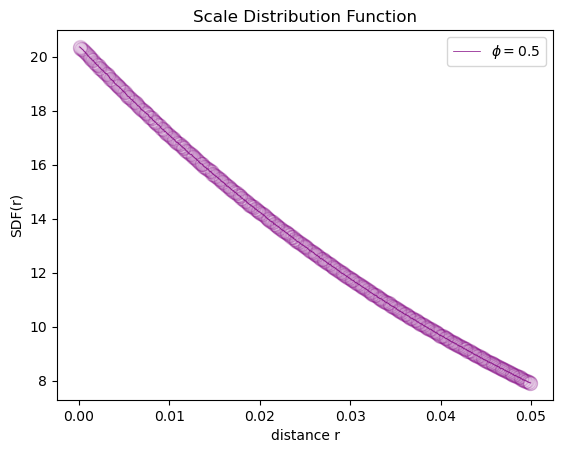

In [4]:
plt.plot(total_sdf_xcompression,total_sdf_sdfcompression,label=r"$\phi={}$".format(packing_density_0),
         linestyle='-',linewidth=0.5,color='purple'
         )

plt.plot(total_sdf_xcompression,total_sdf_sdfcompression,marker='o',
         color='purple',
         markersize=10,            # 标记大小
         markerfacecolor='none',   # 标记内部为空心
         markeredgecolor='purple',  # 标记边框颜色为黑色
         markeredgewidth=1,      # 标记边框宽度
         alpha=0.2
         )

# 使用 scatter 绘制半透明的标记点
#plt.scatter(total_sdf_xcompression,total_sdf_sdfcompression, color='purple',
#             s=100, alpha=0.5,markerfacecolor='none',markereredgewidth=1)

plt.legend()
# 添加标题和标签
plt.title('Scale Distribution Function')
plt.xlabel('distance r')
plt.ylabel('SDF(r)')
plt.show()